<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/SSDP_Flood_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/SSDP_Flood_dataset_kitsune_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,71.030128,698.275480,4.254596e+05,94.536860,688.852207,4.158844e+05,227.715356,679.702301,4.041930e+05,2095.691398,...,0.0,10073.736589,191.389730,188.253039,191.389730,3.543921e+04,0.0,0.0,261388,0.0
1,103.369751,734.244504,4.336694e+05,174.879220,734.393907,4.330045e+05,560.609722,732.648217,4.332032e+05,5895.929353,...,0.0,16785.595641,200.528185,298.850720,200.528185,8.931175e+04,0.0,0.0,759120,0.0
2,121.256410,741.734898,4.428812e+05,194.491879,743.294359,4.416820e+05,542.819665,743.804336,4.396245e+05,4914.135046,...,0.0,26076.382102,158.005818,208.164714,158.005818,4.333255e+04,0.0,0.0,1633535,0.0
3,145.606271,718.813927,4.248902e+05,212.102609,719.515246,4.197664e+05,567.545756,721.439036,4.157489e+05,5479.153357,...,0.0,16095.104004,202.539845,254.085139,202.539845,6.455926e+04,0.0,0.0,2124441,0.0
4,154.933965,755.461156,4.450462e+05,231.277776,754.231415,4.434964e+05,618.624175,750.475836,4.417625e+05,4965.896941,...,0.0,26149.488161,157.507086,206.957049,157.507086,4.283122e+04,0.0,0.0,816513,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,7379.388294,136.000000,1.382432e-10,12294.366516,136.000000,3.637979e-11,36873.805097,136.000000,9.858923e-10,311888.879927,...,0.0,11.780505,136.000000,0.000000,136.000000,0.000000e+00,0.0,0.0,3320052,1.0
40769,7349.763157,136.000000,3.055902e-10,12261.621604,136.000000,8.003553e-11,36822.775672,136.000000,1.091394e-11,337423.623168,...,0.0,18.625073,136.000000,0.000000,136.000000,0.000000e+00,0.0,0.0,3544123,1.0
40770,7389.209551,136.000000,6.184564e-11,12308.391645,136.000000,1.527951e-10,36892.389825,136.000000,6.002665e-10,312890.905198,...,0.0,16.399598,136.000000,0.000003,136.000000,7.275958e-12,0.0,0.0,3326589,1.0
40771,7344.441907,136.000000,9.458745e-11,12260.360776,136.000000,2.582965e-10,36775.713128,136.000000,3.637979e-12,341580.937771,...,0.0,14.579967,136.000000,0.000002,136.000000,3.637979e-12,0.0,0.0,3866299,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.646923
1.0    0.353077
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_SSDP_Flood"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,71.030128,698.275480,4.254596e+05,94.536860,688.852207,4.158844e+05,227.715356,679.702301,4.041930e+05,2095.691398,...,0.0,10073.736589,191.389730,188.253039,191.389730,3.543921e+04,0.0,0.0,261388,0.0
1,103.369751,734.244504,4.336694e+05,174.879220,734.393907,4.330045e+05,560.609722,732.648217,4.332032e+05,5895.929353,...,0.0,16785.595641,200.528185,298.850720,200.528185,8.931175e+04,0.0,0.0,759120,0.0
2,121.256410,741.734898,4.428812e+05,194.491879,743.294359,4.416820e+05,542.819665,743.804336,4.396245e+05,4914.135046,...,0.0,26076.382102,158.005818,208.164714,158.005818,4.333255e+04,0.0,0.0,1633535,0.0
3,145.606271,718.813927,4.248902e+05,212.102609,719.515246,4.197664e+05,567.545756,721.439036,4.157489e+05,5479.153357,...,0.0,16095.104004,202.539845,254.085139,202.539845,6.455926e+04,0.0,0.0,2124441,0.0
4,154.933965,755.461156,4.450462e+05,231.277776,754.231415,4.434964e+05,618.624175,750.475836,4.417625e+05,4965.896941,...,0.0,26149.488161,157.507086,206.957049,157.507086,4.283122e+04,0.0,0.0,816513,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,7379.388294,136.000000,1.382432e-10,12294.366516,136.000000,3.637979e-11,36873.805097,136.000000,9.858923e-10,311888.879927,...,0.0,11.780505,136.000000,0.000000,136.000000,0.000000e+00,0.0,0.0,3320052,1.0
40769,7349.763157,136.000000,3.055902e-10,12261.621604,136.000000,8.003553e-11,36822.775672,136.000000,1.091394e-11,337423.623168,...,0.0,18.625073,136.000000,0.000000,136.000000,0.000000e+00,0.0,0.0,3544123,1.0
40770,7389.209551,136.000000,6.184564e-11,12308.391645,136.000000,1.527951e-10,36892.389825,136.000000,6.002665e-10,312890.905198,...,0.0,16.399598,136.000000,0.000003,136.000000,7.275958e-12,0.0,0.0,3326589,1.0
40771,7344.441907,136.000000,9.458745e-11,12260.360776,136.000000,2.582965e-10,36775.713128,136.000000,3.637979e-12,341580.937771,...,0.0,14.579967,136.000000,0.000002,136.000000,3.637979e-12,0.0,0.0,3866299,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.646923
1.0    0.353077
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
3379,0.017509,0.489459,9.677615e-01,0.016934,0.493608,9.710077e-01,0.016123,0.498049,9.736569e-01,0.016639,...,0.482333,0.466705,0.106031,5.285288e-01,0.106031,2.793427e-01,0.507377,0.581134,0.055695,0.0
29138,0.986776,0.055007,2.751006e-16,0.988326,0.055301,1.463766e-16,0.991460,0.055808,5.638653e-16,0.918427,...,0.482333,0.000470,0.054676,4.605318e-09,0.054676,2.120895e-17,0.507377,0.581134,0.838758,1.0
29994,0.984454,0.055007,1.375503e-16,0.984944,0.055301,3.822056e-16,0.913905,0.055808,6.537568e-17,0.237286,...,0.482333,0.000074,0.054676,4.605318e-09,0.054676,2.120895e-17,0.507377,0.581134,0.666792,1.0
40390,0.988078,0.055007,3.398301e-16,0.989213,0.055301,5.611104e-16,0.991419,0.055808,1.969442e-15,0.865556,...,0.482333,0.000440,0.054676,0.000000e+00,0.054676,0.000000e+00,0.507377,0.581134,0.806047,1.0
32810,0.987335,0.055007,1.699151e-16,0.988411,0.055301,3.903376e-16,0.971727,0.055808,6.455849e-16,0.342454,...,0.482333,0.000037,0.054676,4.605318e-09,0.054676,2.120895e-17,0.507377,0.581134,0.679620,1.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
430,-0.000100,0.000054,0.107908,-0.000084,0.000055,0.107756,-0.000003,0.000056,0.107571,0.001014,...,-0.000126,0.006078,-0.000087,-0.000074,-0.000087,0.011048,-0.000126,-0.000126,0.288622,0.0
36066,0.001685,-0.000093,-0.000126,0.002889,-0.000093,-0.000126,0.008912,-0.000093,-0.000126,0.048121,...,-0.000126,-0.000125,-0.000093,-0.000126,-0.000093,-0.000126,-0.000126,-0.000126,0.712861,1.0
4556,-0.000108,0.000055,0.106324,-0.000094,0.000054,0.106471,-0.000023,0.000055,0.106551,0.001005,...,-0.000126,0.005123,0.000229,-0.000126,0.000229,-0.000126,-0.000126,-0.000126,0.409838,0.0
9242,-0.000117,-0.000110,0.000069,-0.000113,-0.000111,0.000029,-0.000092,-0.000111,-0.000018,0.000194,...,-0.000126,0.002991,-0.000112,-0.000126,0.000218,0.010237,-0.000126,-0.000126,0.291001,0.0
31260,0.001682,-0.000093,-0.000126,0.002886,-0.000093,-0.000126,0.008907,-0.000093,-0.000126,0.056947,...,-0.000126,-0.000125,-0.000093,-0.000126,-0.000093,-0.000126,-0.000126,-0.000126,0.734373,1.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  100.0


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

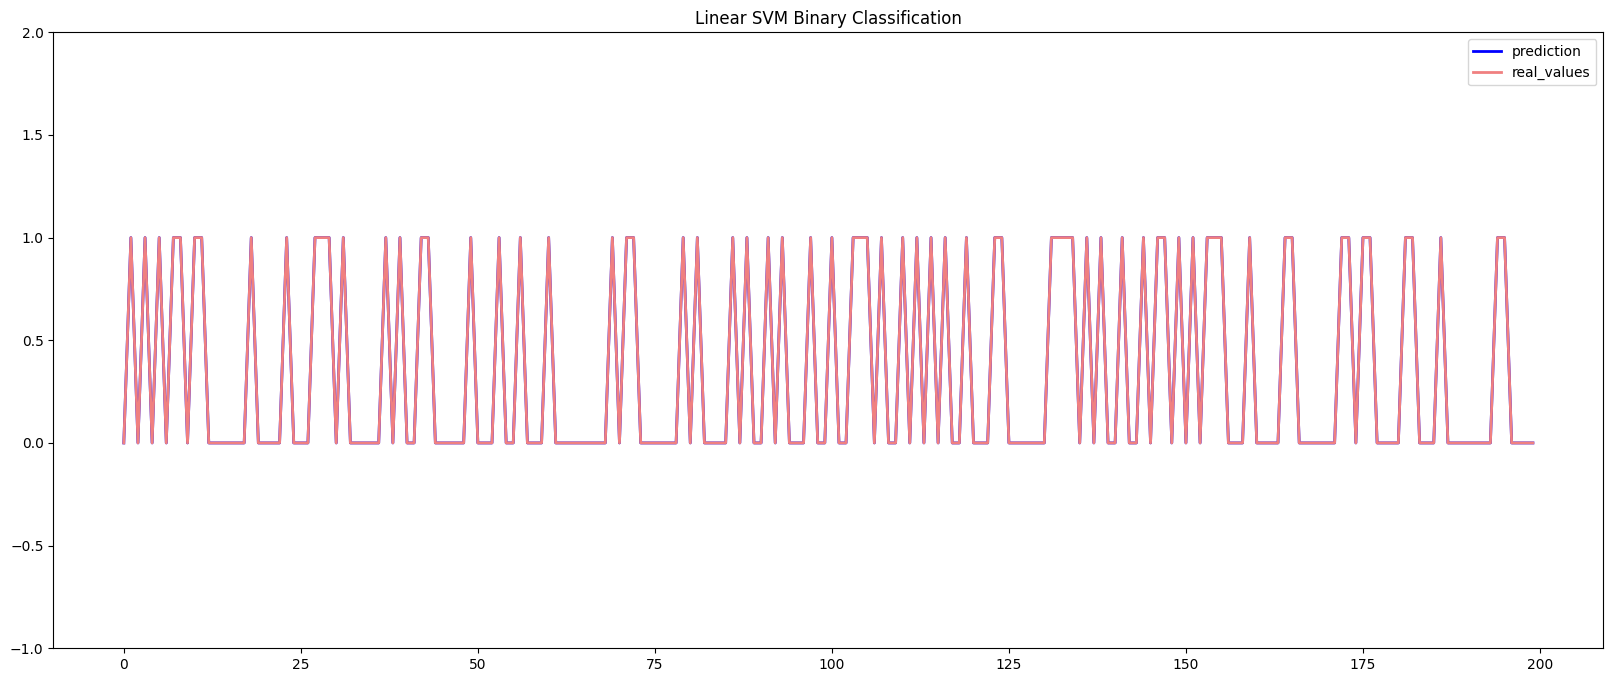

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      6588
     class 1       1.00      1.00      1.00      3606

    accuracy                           1.00     10194
   macro avg       1.00      1.00      1.00     10194
weighted avg       1.00      1.00      1.00     10194

False Positive Rate -  [0.]
False Negative Rate -  [0.]
Thresholds -  [1.]


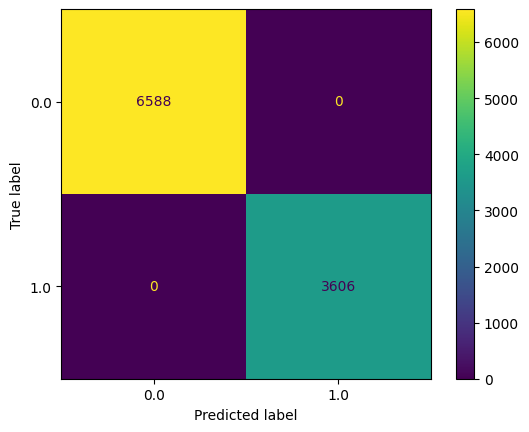

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 6s 74ms/step - loss: 0.4697 - accuracy: 0.9581 - val_loss: 0.3212 - val_accuracy: 0.9827
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2620 - accuracy: 0.9899 - val_loss: 0.1921 - val_accuracy: 0.9899
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.1597 - accuracy: 0.9918 - val_loss: 0.1246 - val_accuracy: 0.9907
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1046 - accuracy: 0.9925 - val_loss: 0.0878 - val_accuracy: 0.9908
Epoch 5/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0742 - accuracy: 0.9930 - val_loss: 0.0678 - val_accuracy: 0.9915
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0575 - accuracy: 0.9935 - val_loss: 0.0568 - val_accuracy: 0.9918
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0480 - accuracy: 0.9938 - val_loss: 0.0504 - val_accuracy: 0.9918
Epoch 8/100
5/5 [===

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

319/319 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9972
Test results - Loss: 0.07535974681377411 - Accuracy: 99.71551895141602


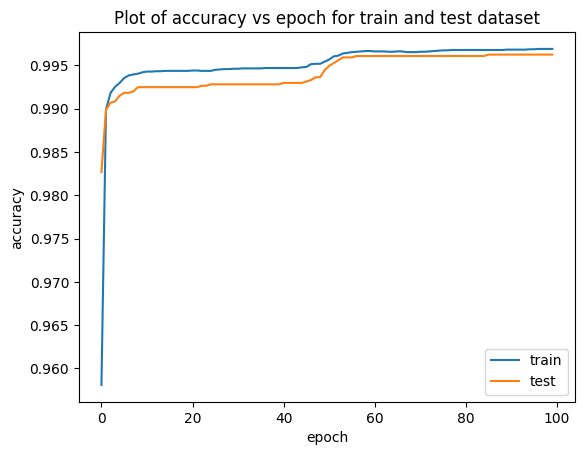

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

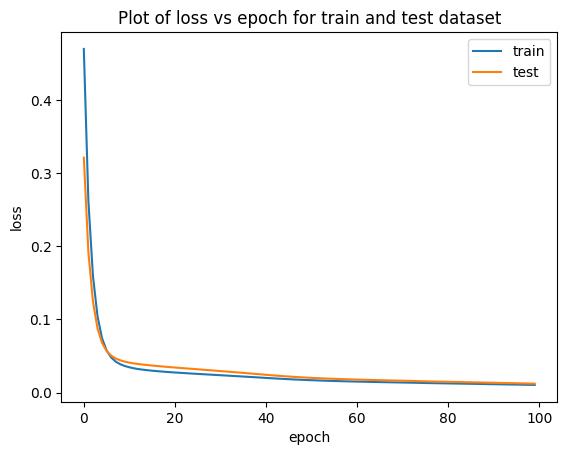

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

319/319 [==============================] - 1s 2ms/step


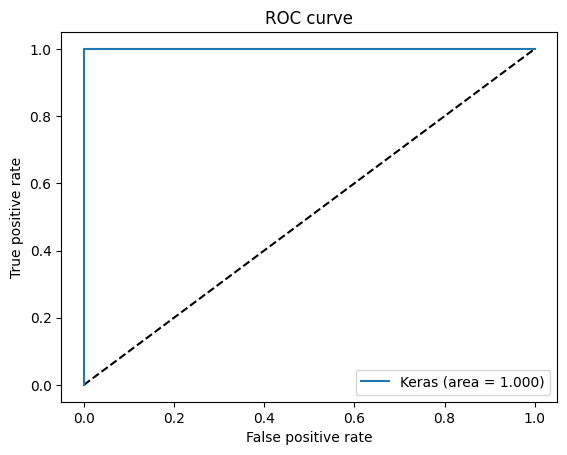

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

319/319 [==============================] - 1s 2ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.9997226844148641
F1 Score -  0.9959939218124051
Precision Score -  0.9922928709055877
False Positive Rate -  [1.         0.00425015]
False Negative Rate -  [0.         0.00027732]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6588
           1       0.99      1.00      1.00      3606

    accuracy                           1.00     10194
   macro avg       1.00      1.00      1.00     10194
weighted avg       1.00      1.00      1.00     10194



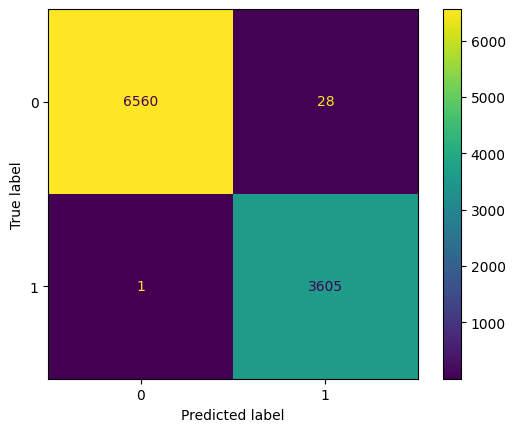

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X57      0.461289
X85      0.469109
X92      0.494110
X106     0.494202
X110     0.513466
           ...   
X1       0.984530
X16      0.984560
X66      0.984561
X31      0.984561
label    1.000000
Name: label, Length: 91, dtype: float64

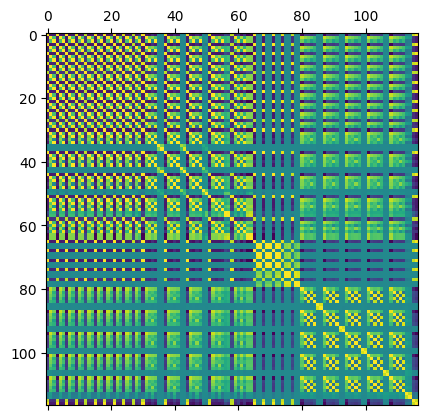

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(30579, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(30579, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(10194, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 4s 120ms/step - loss: 0.6561 - accuracy: 0.5192 - val_loss: 0.5623 - val_accuracy: 0.8465
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5116 - accuracy: 0.9449 - val_loss: 0.4400 - val_accuracy: 0.9792
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.4008 - accuracy: 0.9854 - val_loss: 0.3460 - val_accuracy: 0.9830
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.3146 - accuracy: 0.9881 - val_loss: 0.2721 - val_accuracy: 0.9872
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.2462 - accuracy: 0.9904 - val_loss: 0.2135 - val_accuracy: 0.9894
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1921 - accuracy: 0.9914 - val_loss: 0.1679 - val_accuracy: 0.9899
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1504 - accuracy: 0.9922 - val_loss: 0.1337 - val_accuracy: 0.9907
Epoch 8/100
5/5 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

319/319 [==============================] - 2s 3ms/step - loss: 0.1063 - accuracy: 0.9972
Test results - Loss: 0.10630159080028534 - Accuracy: 99.71551895141602%


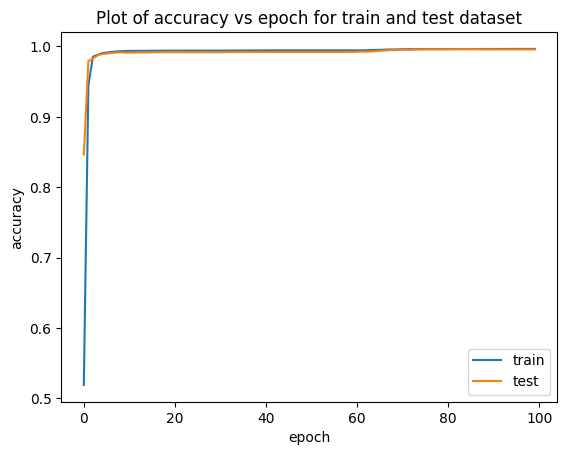

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

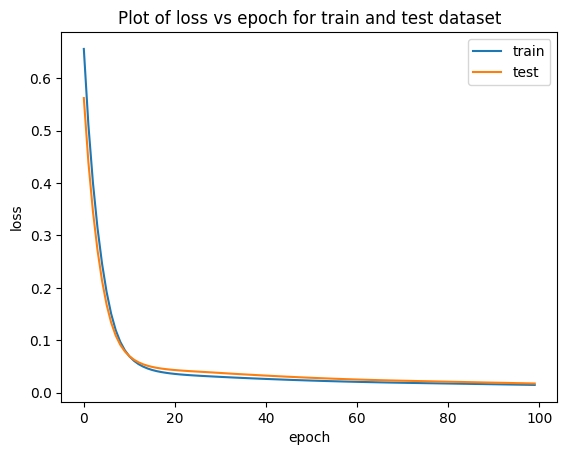

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(10194,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

319/319 [==============================] - 1s 2ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.9997226844148641
F1 Score -  0.9959939218124051
Precision Score -  0.9922928709055877
False Positive Rate -  [1.         0.00425015]
False Negative Rate -  [0.         0.00027732]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6588
           1       0.99      1.00      1.00      3606

    accuracy                           1.00     10194
   macro avg       1.00      1.00      1.00     10194
weighted avg       1.00      1.00      1.00     10194



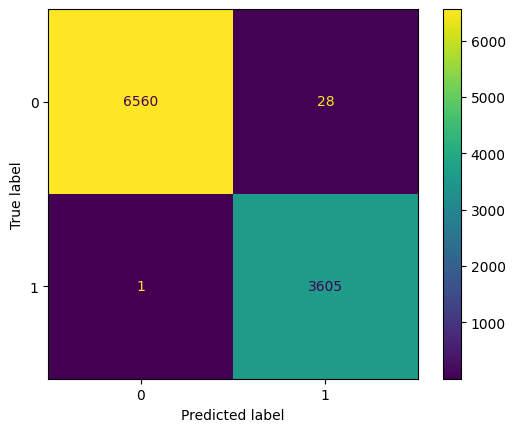

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 0.2538 - accuracy: 2.9432e-04 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.0955 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2473 - accuracy: 0.1325 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.1614 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.1908 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2471 - accuracy: 0.2000 - val_loss: 10438916939186176.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
62/62 [===========

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

319/319 [==============================] - 1s 2ms/step - loss: 10438912644218880.0000 - accuracy: 0.0000e+00
Test results - Loss: 1.043891264421888e+16 - Accuracy: 0.0%


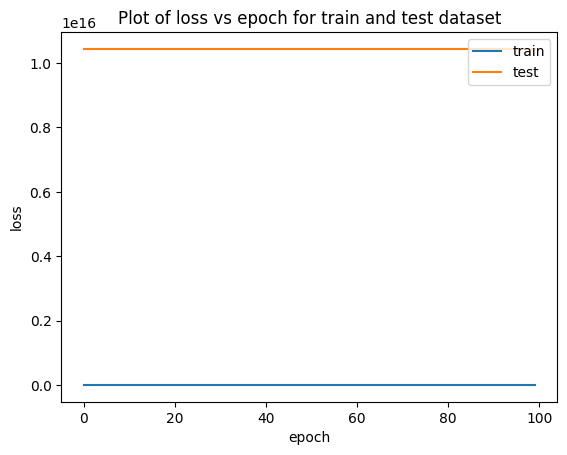

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

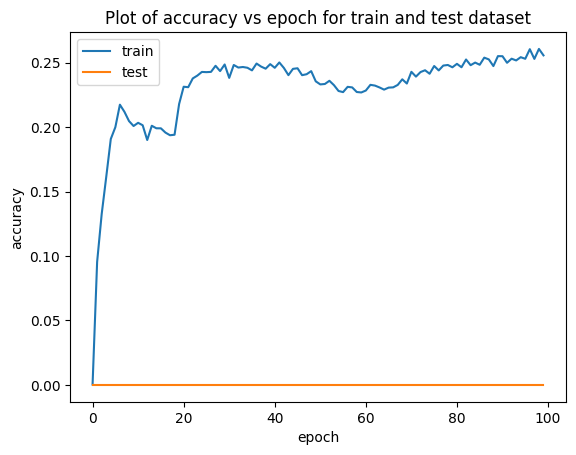

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

319/319 [==============================] - 1s 2ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(10194, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
17/17 [==============================] - 2s 14ms/step - loss: 0.6477 - accuracy: 0.6486 - val_loss: 0.6410 - val_accuracy: 0.6371
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6486 - val_loss: 0.6295 - val_accuracy: 0.6371
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.6156 - accuracy: 0.6486 - val_loss: 0.6159 - val_accuracy: 0.6371
Epoch 4/300
17/17 [==============================] - 0s 7ms/step - loss: 0.6027 - accuracy: 0.6486 - val_loss: 0.6032 - val_accuracy: 0.6371
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.5895 - accuracy: 0.6486 - val_loss: 0.5896 - val_accuracy: 0.6371
Epoch 6/300
17/17 [==============================] - 0s 6ms/step - loss: 0.5755 - accuracy: 0.6486 - val_loss: 0.5753 - val_accuracy: 0.6371
Epoch 7/300
17/17 [==============================] - 0s 5ms/step - loss: 0.5607 - accuracy: 0.6486 - val_loss: 0.5602 - val_accuracy: 0.6371
Epoch 8/300


In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

319/319 [==============================] - 1s 2ms/step - loss: 15.4171 - accuracy: 0.3587
Test results - Loss: 15.417146682739258 - Accuracy: 35.87404489517212%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

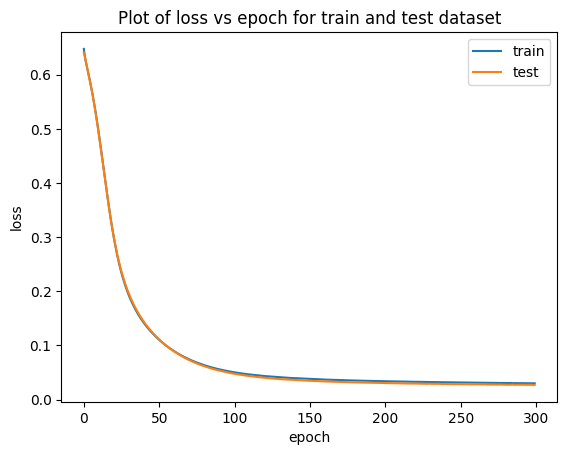

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

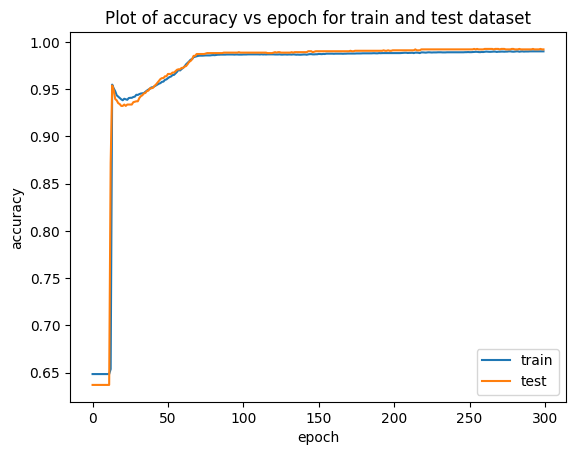

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

319/319 [==============================] - 1s 2ms/step


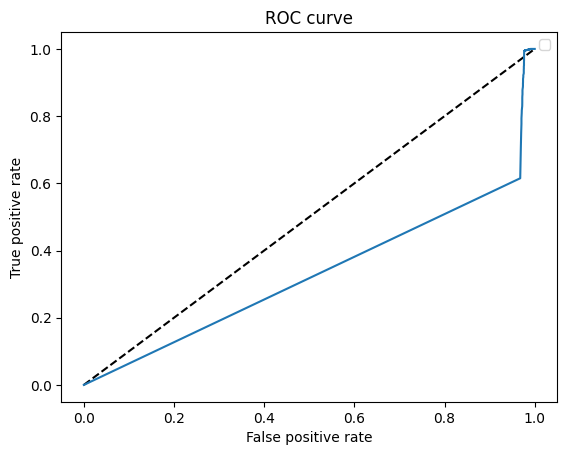

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

319/319 [==============================] - 1s 2ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  1.0
F1 Score -  0.5245472397992581
Precision Score -  0.35551611949127476
False Positive Rate -  [0.99225865]
False Negative Rate -  [0.]
Thresholds -  [1]


              precision    recall  f1-score   support

           0       1.00      0.01      0.02      6588
           1       0.36      1.00      0.52      3606

    accuracy                           0.36     10194
   macro avg       0.68      0.50      0.27     10194
weighted avg       0.77      0.36      0.20     10194



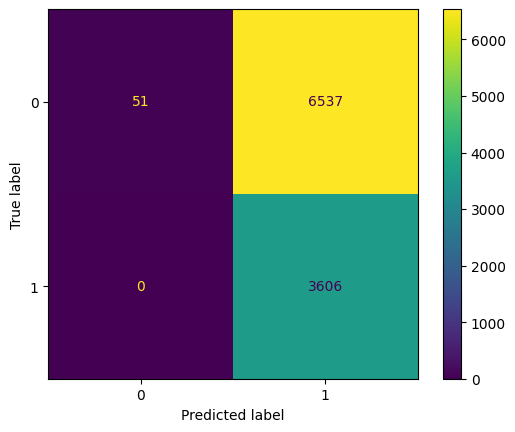

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()